<a href="https://colab.research.google.com/github/Itsmrk/Deep_learning/blob/master/05_classifying_images_of_colthing_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install and import dependencies**

In [0]:
import tensorflow as tf

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
#Helping Libraries
import math
import numpy as np
import matplotlib.pyplot as plt


In [0]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### **Import the Fashion MNIST dataset**

In [0]:
dataset , metadata = tfds.load('fashion_mnist', as_supervised=True , with_info=True)
train_dataset, test_dataset = dataset['train'] , dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### **Explore the data**

In [49]:
num_train_examples = metadata.splits['train'].num_examples
print('Number of train Examples : {}'.format(num_train_examples))
num_test_examples = metadata.splits['test'].num_examples
print('Number of test Examples : {}'.format(num_test_examples))

Number of train Examples : 60000
Number of test Examples : 10000


### **Preprocess the data**

In [0]:
def normalize(images , labels ):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images , labels

train_dataset = train_dataset.map(normalize) 
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

### **Explore the processed data**

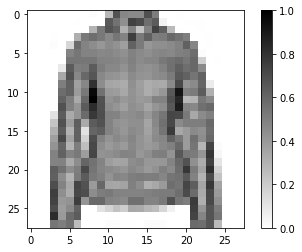

In [51]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image , cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


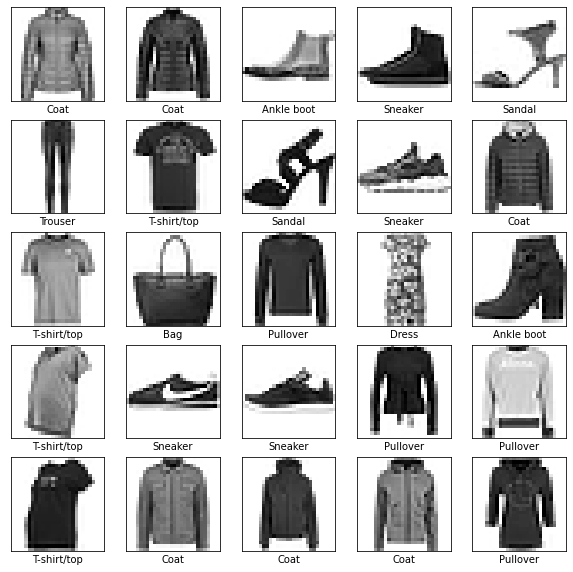

In [52]:
plt.figure(figsize=(10,10))
i = 0 
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image , cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

## **Build the model**

### **Setup the layers**

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), padding= 'same', activation = tf.nn.relu , input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2),strides =2),
                             tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
                             tf.keras.layers.MaxPool2D((2,2), strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### **Compile the model**

In [0]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

### **Train the model**

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [56]:
model.fit(train_dataset, epochs=10 , steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7196 - accuracy: 0.7429
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6252 - accuracy: 0.8365
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5736 - accuracy: 0.8877
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5611 - accuracy: 0.8999
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5546 - accuracy: 0.9069
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5498 - accuracy: 0.9115
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5436 - accuracy: 0.9177
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5420 - accuracy: 0.9192
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5393 - accuracy: 0.9218
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.535

### **Evaluate accuracy**

In [57]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 1.5616 - accuracy: 0.8987
Accuracy on test dataset: 0.8986999988555908


### **Make predictions and explore**

In [0]:
for test_images , test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [59]:
predictions.shape

(32, 10)

In [60]:
predictions[0]

array([8.52940443e-22, 5.22515008e-22, 2.88779553e-13, 2.58563756e-24,
       9.99991298e-01, 1.11102045e-26, 8.66529717e-06, 1.91709088e-23,
       4.14107042e-23, 1.05787595e-20], dtype=float32)

In [61]:
np.argmax(predictions[0])

4

In [62]:
test_labels[0]

4

In [0]:
"""def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i] , true_labels[i] , images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0],cmap= plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
             color = color)
  def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i] , true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')"""
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

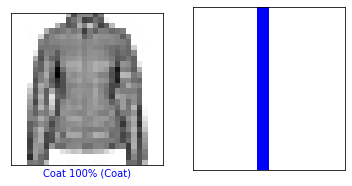

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

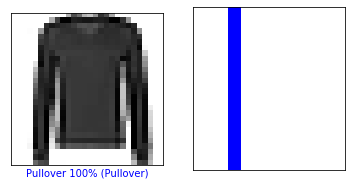

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

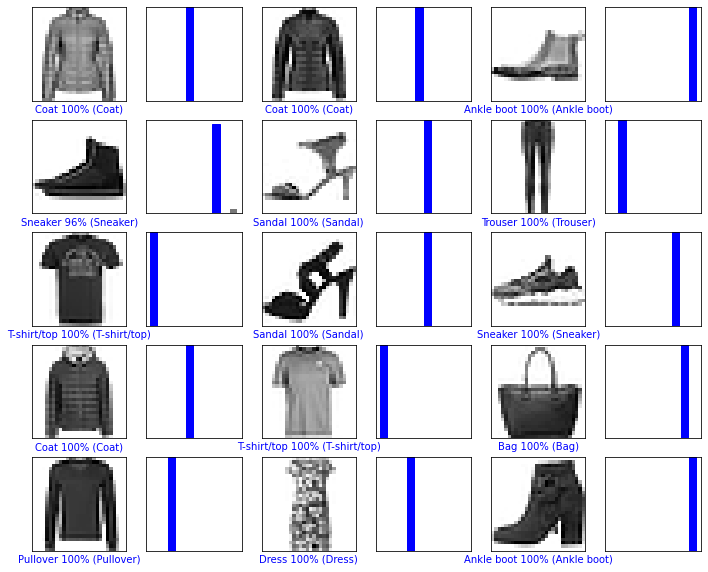

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [67]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [68]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [69]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.5294044e-22 5.2251698e-22 2.8878064e-13 2.5856474e-24 9.9999130e-01
  1.1110289e-26 8.6653135e-06 1.9170909e-23 4.1410862e-23 1.0578800e-20]]


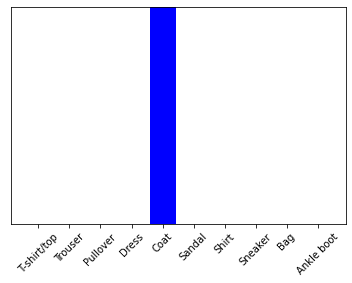

In [70]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [71]:
np.argmax(predictions_single[0])

4